In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob, os
import sys

In [5]:
lob = pd.read_pickle('/Users/a16643222/Documents/abides_zbg/data/marketreplay/input/LOB_df.pkl')
lob = lob[(lob.Time > '2021-03-22 10:30') & (lob.Time < '2021-03-22 11:30')]
lob['correction'] = lob.groupby('Time').cumcount()
lob['Time'] = lob['Time'] + lob.correction.apply(lambda x: pd.Timedelta(x, unit='ns'))
lob.rename(columns={
                'Time':'Timestamp',
                'SIZE':'Size',
                'PRICE':'Price',
                'ORDER_ID':'Order_ID',
                'RECORD_TYPE':'Type'
            }, inplace=True)
lob.head()

,Timestamp,SEQ_NUM,Order_ID,Price,BUY_SELL_FLAG,Size,Type,correction
491248,2021-03-22 10:30:00.000369000,491249,960315,75.1275,1,0,R,0
491249,2021-03-22 10:30:00.000369001,491250,963582,75.1275,1,1,R,1
491250,2021-03-22 10:30:00.000977000,491251,963444,74.4725,0,148,R,0
491251,2021-03-22 10:30:00.024430000,491252,963444,74.4725,0,0,R,0
491252,2021-03-22 10:30:00.024430001,491253,963447,74.4725,0,0,R,1


In [18]:
mom = pd.read_pickle('/Users/a16643222/Documents/abides_zbg/log/USD_pickle/MOMENTUM_AGENT_2.bz2', 
               compression='bz2')
mom.reset_index(inplace = True)
mom.head(15)

,EventTime,EventType,Event
0,NaT,AGENT_TYPE,MomentumAgent
1,NaT,STARTING_CASH,10000000
2,2021-03-22 00:00:00.000000000,HOLDINGS_UPDATED,{'CASH': 10000000}
3,2021-03-22 10:30:20.000027296,BID_DEPTH,"[(74.475, 199)]"
4,2021-03-22 10:30:20.000027296,ASK_DEPTH,"[(74.48, 644)]"
5,2021-03-22 10:30:20.000027296,IMBALANCE,"[199, 644]"
6,2021-03-22 10:30:40.000054592,BID_DEPTH,"[(74.48, 44)]"
7,2021-03-22 10:30:40.000054592,ASK_DEPTH,"[(74.485, 581)]"
8,2021-03-22 10:30:40.000054592,IMBALANCE,"[44, 581]"
9,2021-03-22 10:31:00.000081888,BID_DEPTH,"[(74.4725, 300)]"


# Best rejects

In [14]:
from pathlib import Path
LOGS = Path('/Users/a16643222/Documents/abides_zbg/log/USD_09_replay/')
files = sorted([i for i in LOGS.glob('REJECT_REPLAY_AGENT_2_09*')])
df_list = [] 
for p in files:
    rej = pd.read_pickle(p, compression='bz2')
    rej.reset_index(inplace = True)
    rej['file_name'] = str(p)[-8:-4]
    df_list.append(rej)
rej_list = pd.concat(df_list, axis = 0)


In [19]:
rej_list[rej_list.EventType == 'ENDING_CASH'].Event.sum()

-3283656.090736839

In [20]:
rej_list.to_pickle('rej_list.pkl')

In [38]:
rej_list

,EventTime,EventType,Event,file_name
0,NaT,AGENT_TYPE,RejectReplayAgent,0901
1,NaT,STARTING_CASH,0,0901
2,2020-09-01 00:00:00.000000000,HOLDINGS_UPDATED,{'CASH': 0},0901
3,2020-09-01 10:00:37.290616989,HOLDINGS_UPDATED,"{'CASH': 368524.5, 'USD': -5000.0}",0901
4,2020-09-01 10:00:39.290616989,ORDER_SUBMITTED,"{'agent_id': 2, 'time_placed': '2020-09-01T10:...",0901
...,...,...,...,...
113,2020-09-30 10:52:02.223652231,FINAL_HOLDINGS,"{ USD: -216132.11097377, CASH: 16997148.494092...",0930
114,2020-09-30 10:52:02.223652231,FINAL_CASH_POSITION,1.69971e+07,0930
115,2020-09-30 10:52:02.223652231,MARK_TO_MARKET,-216132.11097377 USD @ 78.77 == -17024726.3814...,0930
116,2020-09-30 10:52:02.223652231,MARKED_TO_MARKET,-27577.9,0930


In [37]:
rej_list.iloc[5, :]['Event']

{'agent_id': 2,
 'time_placed': '2020-09-01T10:00:39.290616989',
 'symbol': 'USD',
 'quantity': 5000.0,
 'is_buy_order': True,
 'order_id': 1,
 'fill_price': 73.7125,
 'tag': None,
 'limit_price': 73.7125}

# All rejects

In [42]:
from pathlib import Path
LOGS = Path('/Users/a16643222/Documents/abides_zbg/log/USD_09_replay_all_morning/')
files = sorted([i for i in LOGS.glob('REJECT_REPLAY_AGENT_2_09*')])
df_list = [] 
for p in files:
    rej = pd.read_pickle(p, compression='bz2')
    rej.reset_index(inplace = True)
    rej['file_name'] = str(p)[-8:-4]
    df_list.append(rej)
all_rej_list = pd.concat(df_list, axis = 0)

In [43]:
all_rej_list[all_rej_list.EventType == 'ENDING_CASH'].Event.sum()

-4163684.4628148116

In [24]:
exch = pd.read_pickle('/Users/a16643222/Documents/abides_zbg/log/USD_pickle/EXCHANGE_AGENT.bz2', 
               compression='bz2')
exch.reset_index(inplace = True)
exch.set_index('EventTime', inplace = True)

In [25]:
def getFillPrice(x):
    if 'fill_price' in x:
        return x['fill_price']
    else:
        return None
executed  = mom[mom.EventType == 'ORDER_EXECUTED'][['Event', 'EventTime']]
executed['fill_price'] = executed['Event'].apply(getFillPrice)
executed = executed[executed['fill_price'].notnull()]
executed['is_buy_order'] = executed['Event'].apply(lambda x: x['is_buy_order'])
executed.set_index('EventTime', inplace = True)
executed['fill_price'] = executed['fill_price'].astype(float)
executed.index = pd.to_datetime(executed.index)

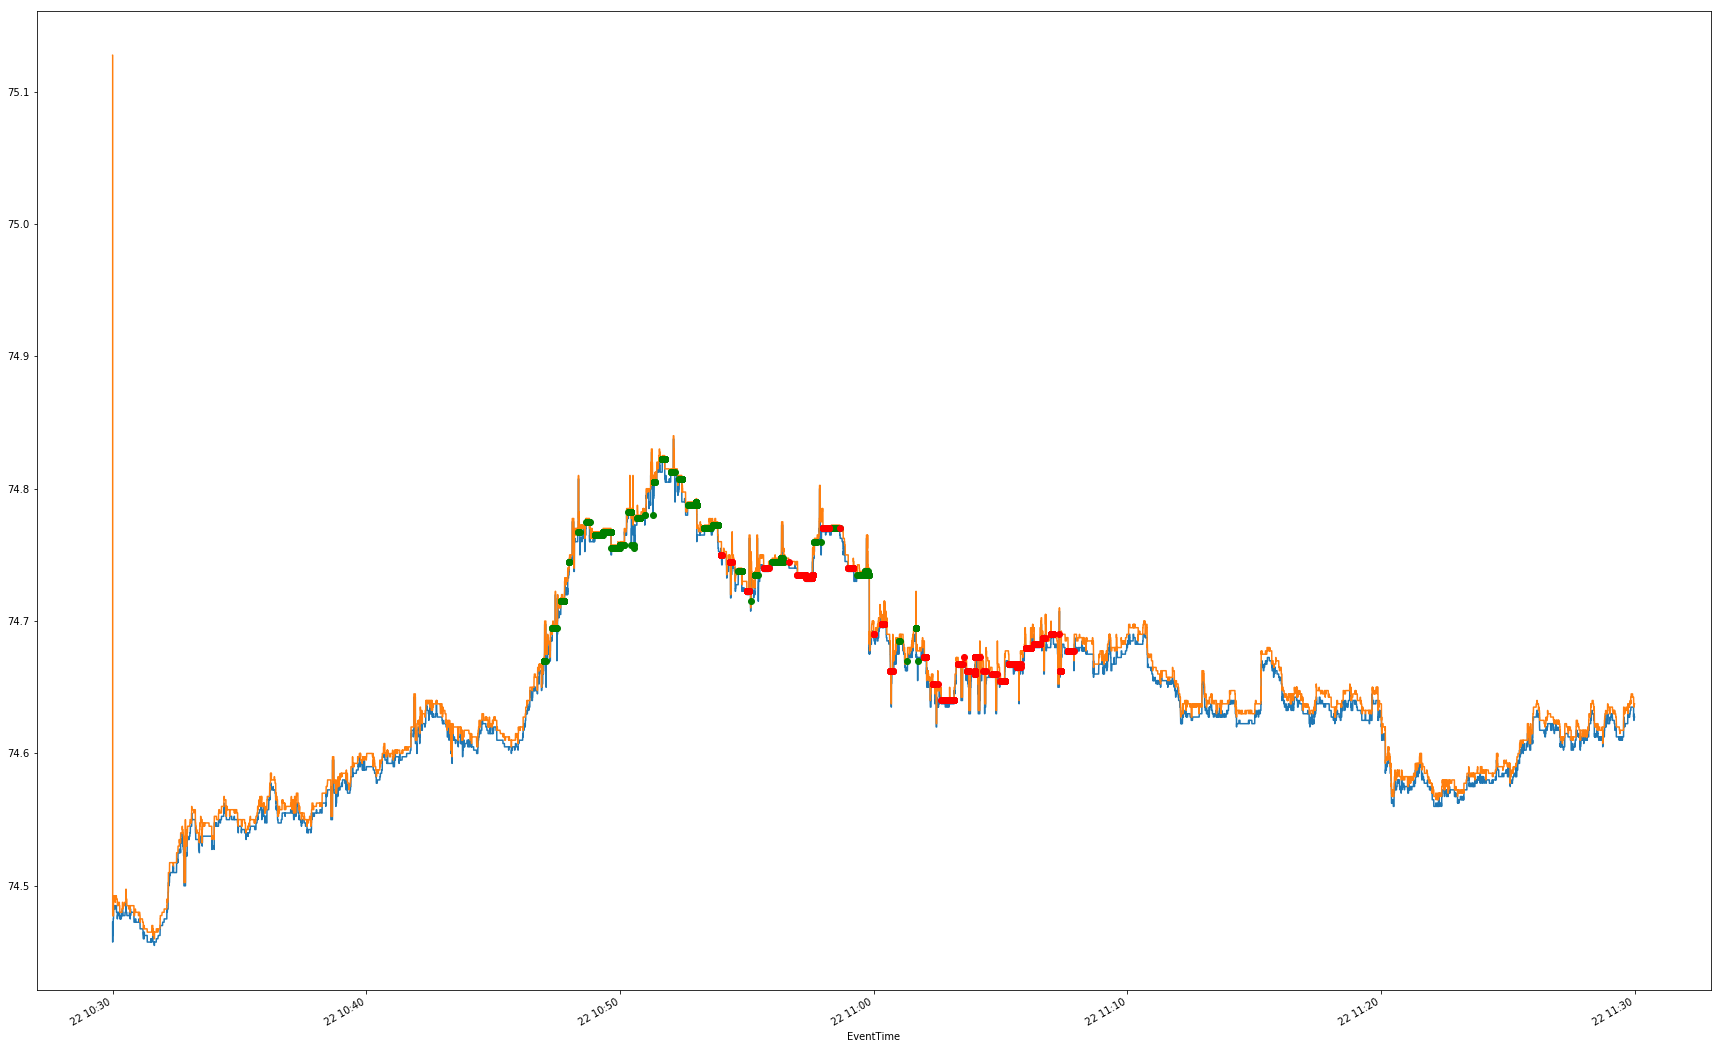

In [26]:
from matplotlib.pyplot import figure

figure(figsize=(30, 20))
exch[(exch.EventType == 'BEST_BID') ].Event.apply(lambda x: float(x.split(',')[1])).plot()
exch[exch.EventType == 'BEST_ASK'].Event.apply(lambda x: float(x.split(',')[1])).plot()
executed[(executed.is_buy_order == True)]['fill_price'].plot(style = 'o', c = 'green')
executed[(executed.is_buy_order == False)]['fill_price'].plot(style = 'o', c = 'red')

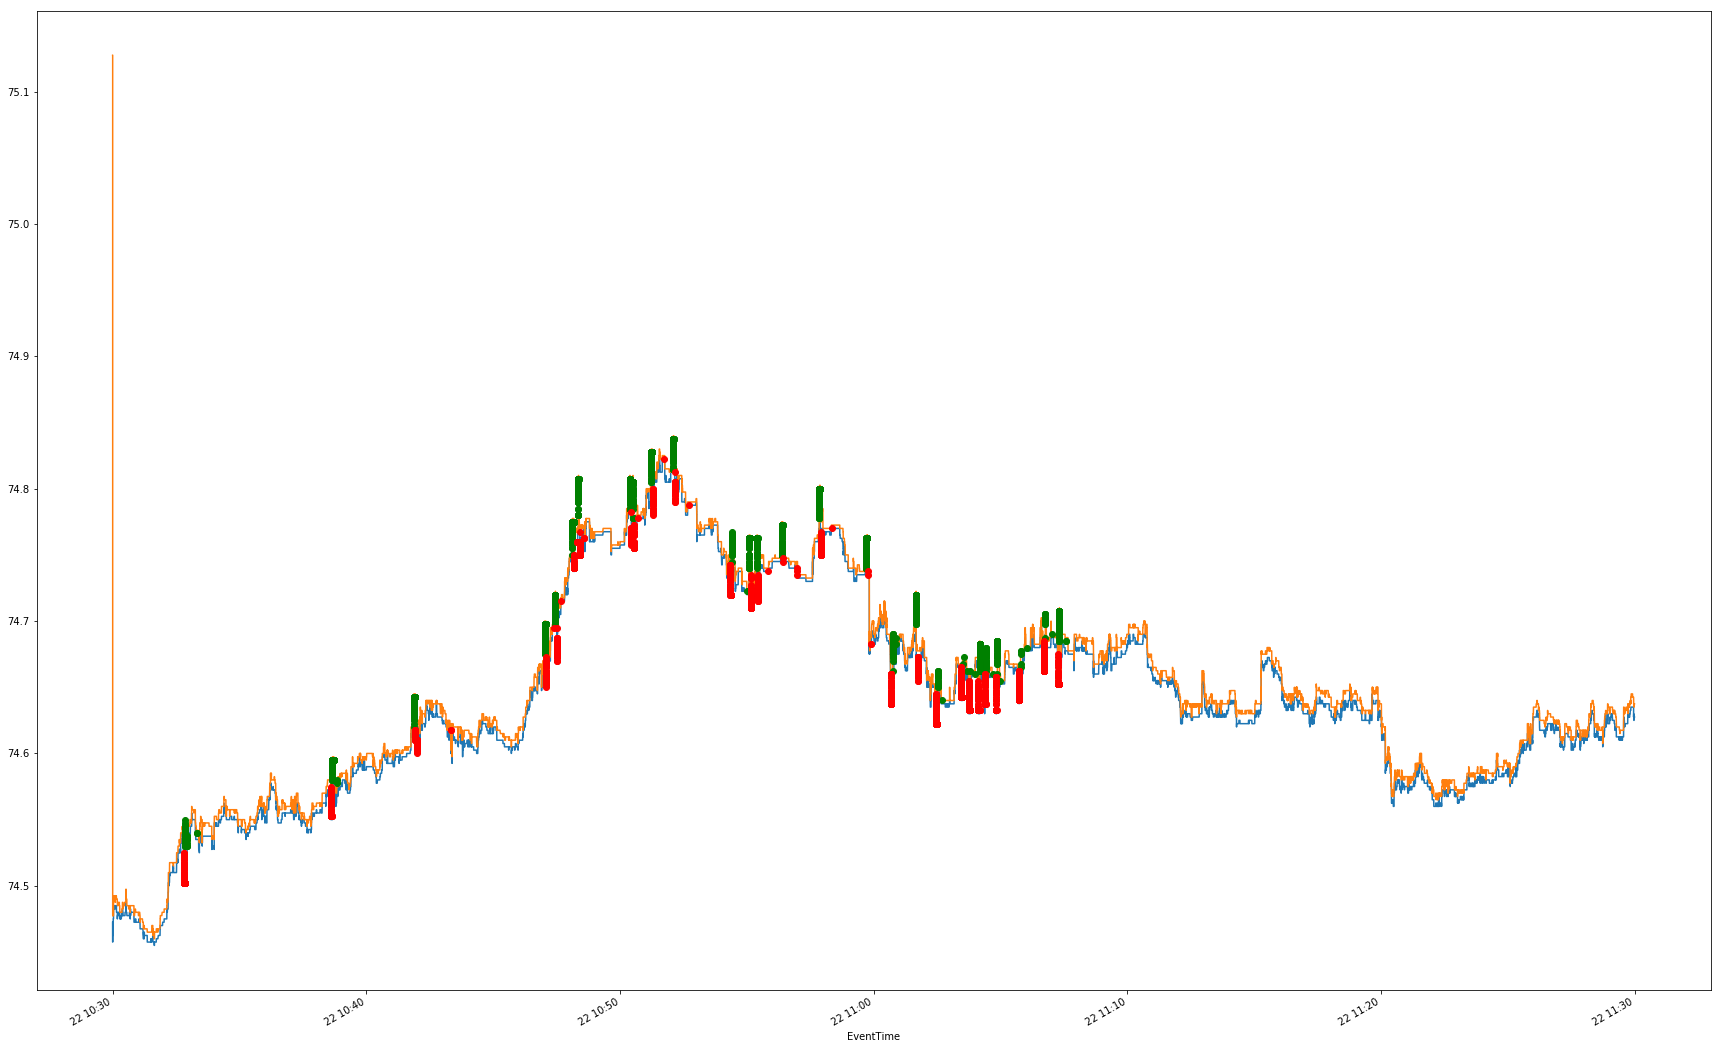

In [28]:
def getFillPrice(x):
    if 'fill_price' in x:
        return x['fill_price']
    else:
        return None
executed  = obi[obi.EventType == 'ORDER_EXECUTED'][['Event', 'EventTime']]
executed['fill_price'] = executed['Event'].apply(getFillPrice)
executed = executed[executed['fill_price'].notnull()]
executed['is_buy_order'] = executed['Event'].apply(lambda x: x['is_buy_order'])
executed.set_index('EventTime', inplace = True)
executed['fill_price'] = executed['fill_price'].astype(float)
executed.index = pd.to_datetime(executed.index)

figure(figsize=(30, 20))
exch[(exch.EventType == 'BEST_BID') ].Event.apply(lambda x: float(x.split(',')[1])).plot()
exch[exch.EventType == 'BEST_ASK'].Event.apply(lambda x: float(x.split(',')[1])).plot()
executed[(executed.is_buy_order == True)]['fill_price'].plot(style = 'o', c = 'green')
executed[(executed.is_buy_order == False)]['fill_price'].plot(style = 'o', c = 'red')

In [34]:
mom[mom.EventType == 'HOLDINGS_UPDATED'].iloc[-3:,:]

,EventTime,EventType,Event
5737,2021-03-22 11:07:49.828171682,HOLDINGS_UPDATED,"{'CASH': 9532908.477499982, 'USD': 6070}"
5739,2021-03-22 11:07:51.749419682,HOLDINGS_UPDATED,"{'CASH': 9536642.352499982, 'USD': 6020}"
5741,2021-03-22 11:07:53.365289682,HOLDINGS_UPDATED,"{'CASH': 9536866.384999983, 'USD': 6017}"


In [36]:
obi[obi.EventType == 'HOLDINGS_UPDATED'].iloc[-3:,:]

,EventTime,EventType,Event
6737,2021-03-22 11:07:19.618968913,HOLDINGS_UPDATED,"{'CASH': 9999523.802499974, 'USD': -100}"
6744,2021-03-22 11:07:34.164115672,HOLDINGS_UPDATED,"{'CASH': 9995789.552499974, 'USD': -50}"
6746,2021-03-22 11:07:34.164115673,HOLDINGS_UPDATED,{'CASH': 9992055.302499974}


In [35]:
exch[(exch.EventType == 'BEST_BID') ].iloc[-3:,:]

,EventType,Event
EventTime,,
2021-03-22 11:29:59.868037035,BEST_BID,"USD,74.6275,211"
2021-03-22 11:29:59.873165035,BEST_BID,"USD,74.6275,211"
2021-03-22 11:29:59.939556034,BEST_BID,"USD,74.6275,211"


## MarketReplayAgent: 22150 <br>
## MomentumAgent: -11859 <br>
## OrderBookImbalanceAgent: -7945 <br>